In [16]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split, cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [17]:
df = pd.read_csv('crimedata2.csv', sep = ',', header = 0)
df.head(5)

,communityName,state,PctPopUnderPov,PctUnemployed,MedNumBR,racepctblack,TotalPctDiv,racePctWhite,racePctHisp,PctNotHSGrad,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,1.96,2.70,3,1.37,4.47,91.78,1.88,9.90,41.02
1,Marpletownship,PA,3.98,2.43,3,0.80,5.42,95.57,0.85,13.72,127.56
2,Tigardcity,OR,4.75,4.01,3,0.74,12.55,94.33,2.35,9.09,218.59
3,Gloversvillecity,NY,17.23,9.86,3,1.70,12.91,97.35,0.70,33.68,306.64
4,Bemidjicity,MN,29.99,9.08,2,0.53,9.73,89.16,0.52,23.06,NaN


In [18]:
print(df.shape)

(2215, 11)


#Columns names

In [19]:
columnList = ['communityName',
                'state',
                'pctPopUnderPov',
                'pctUnemployed',
                'medNumBR',
                'racePctBlack',
                'totalPctDiv',
                'racePctWhite',
                'racePctHisp',
                'pctNotHSGrad',
                'violentCrimesPerPop']
df.columns = columnList

#Missing values

In [20]:
df.isna().sum()

communityName            0
state                    0
pctPopUnderPov           0
pctUnemployed            0
medNumBR                 0
racePctBlack             0
totalPctDiv              0
racePctWhite             0
racePctHisp              0
pctNotHSGrad             0
violentCrimesPerPop    221
dtype: int64

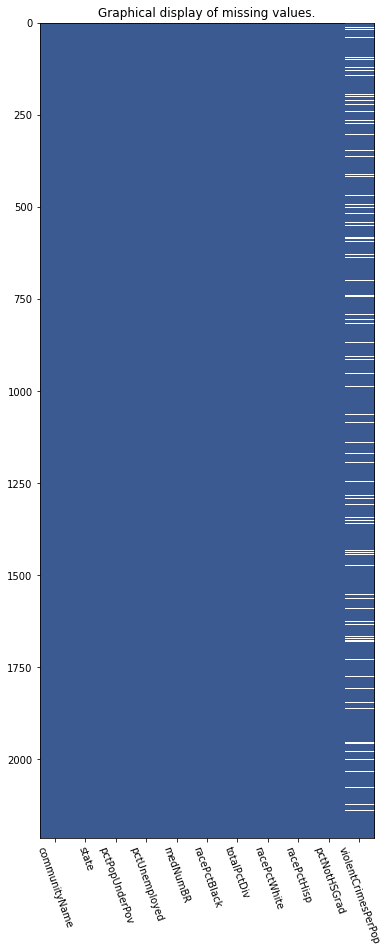

In [21]:
from matplotlib.colors import ListedColormap
def plotTableNA(dataF, addToTilte =""):
    '''  Function for drawing a plot showing missing values '''
    if   len(dataF.columns)> 20:   K = 3
    elif len(dataF.columns)== 1:   K = 1
    else:                          K = 1.7

    figSizeH = 15        # hight
    figSizeW =int(len(dataF.columns)/K) # width
    fig, ax = plt.subplots( figsize=(figSizeW, figSizeH))

    plt.imshow( dataF.isna(),
                cmap = ListedColormap([ '#3B5A92', 'white', ]), #cm.get_cmap('jet'),
                aspect='auto',  # ‘auto’ | ‘equal’ | scalar]
                interpolation= 'none',)
    ax.set_xticks(np.arange(len(dataF.columns)))
    ax.set_xticklabels(dataF.columns, rotation=-70,)
    plt.title("Graphical display of missing values."+ addToTilte)


plotTableNA(df, "")

In [22]:
df = df.dropna(axis='index', how='any')

In [23]:
df.isna().sum()

communityName          0
state                  0
pctPopUnderPov         0
pctUnemployed          0
medNumBR               0
racePctBlack           0
totalPctDiv            0
racePctWhite           0
racePctHisp            0
pctNotHSGrad           0
violentCrimesPerPop    0
dtype: int64

#Converting qualitative data to quantitative data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2214
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   communityName        1994 non-null   object 
 1   state                1994 non-null   object 
 2   pctPopUnderPov       1994 non-null   float64
 3   pctUnemployed        1994 non-null   float64
 4   medNumBR             1994 non-null   int64  
 5   racePctBlack         1994 non-null   float64
 6   totalPctDiv          1994 non-null   float64
 7   racePctWhite         1994 non-null   float64
 8   racePctHisp          1994 non-null   float64
 9   pctNotHSGrad         1994 non-null   float64
 10  violentCrimesPerPop  1994 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 186.9+ KB


In [25]:
df.describe(include = object)

,communityName,state
count,1994,1994
unique,1828,46
top,Greenvillecity,CA
freq,5,278


In [26]:
df['medNumBR'].nunique()

4

In [27]:
df_dummies = pd.get_dummies(pd.Series(df['medNumBR']), prefix='NumBR')
df_dummies.head()

,NumBR_1,NumBR_2,NumBR_3,NumBR_4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
5,0,1,0,0


In [28]:
# list of quantitative columns
digitColName = ['pctPopUnderPov',
                'pctUnemployed',
                'totalPctDiv',
                'racePctBlack',
                'racePctWhite',
                'racePctHisp',
                'pctNotHSGrad',
                'violentCrimesPerPop']

#concatenation chosen columns from df with df_dummies
df_digPlus  = pd.concat([df[digitColName], df_dummies], axis='columns')
df_digPlus.head()

,pctPopUnderPov,pctUnemployed,totalPctDiv,racePctBlack,racePctWhite,racePctHisp,pctNotHSGrad,violentCrimesPerPop,NumBR_1,NumBR_2,NumBR_3,NumBR_4
0,1.96,2.70,4.47,1.37,91.78,1.88,9.90,41.02,0,0,1,0
1,3.98,2.43,5.42,0.80,95.57,0.85,13.72,127.56,0,0,1,0
2,4.75,4.01,12.55,0.74,94.33,2.35,9.09,218.59,0,0,1,0
3,17.23,9.86,12.91,1.70,97.35,0.70,33.68,306.64,0,0,1,0
5,17.78,5.72,13.04,2.51,95.65,0.95,23.03,442.95,0,1,0,0


# selection of target value and columns for analysis

In [29]:
corr_df = df_digPlus.corr(method = 'pearson')
corr_df["violentCrimesPerPop"]

pctPopUnderPov         0.505349
pctUnemployed          0.483441
totalPctDiv            0.536549
racePctBlack           0.628368
racePctWhite          -0.676849
racePctHisp            0.253596
pctNotHSGrad           0.467596
violentCrimesPerPop    1.000000
NumBR_1                0.130747
NumBR_2                0.316034
NumBR_3               -0.307087
NumBR_4               -0.094196
Name: violentCrimesPerPop, dtype: float64

/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


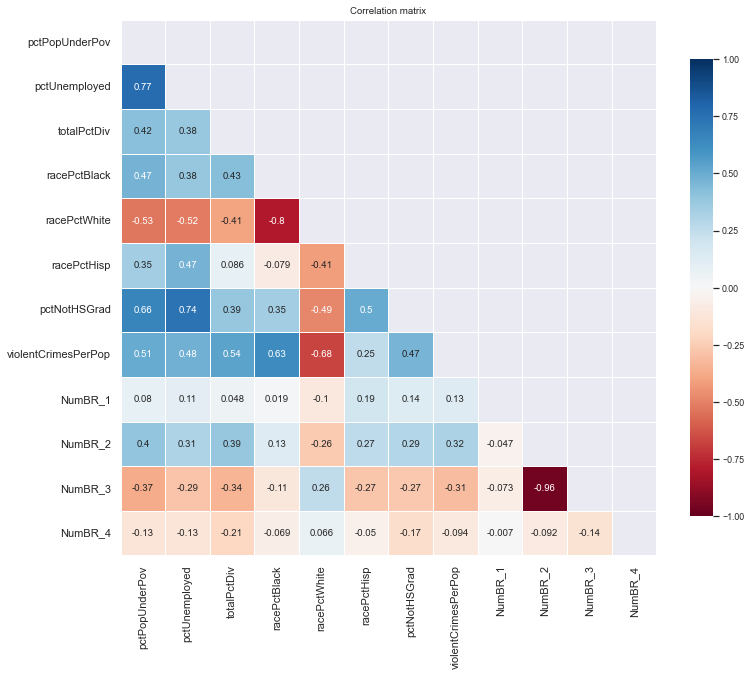

In [30]:
sns.set(style="dark")

mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8)

sns.heatmap(
            data=corr_df,
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu',
            mask=mask,
            square=True,
            linewidths=1.0,
            cbar_kws={"shrink": .7}
           )
plt.title(u'Correlation matrix');

In [34]:
corr_df

,pctPopUnderPov,pctUnemployed,totalPctDiv,racePctBlack,racePctWhite,racePctHisp,pctNotHSGrad,violentCrimesPerPop,NumBR_1,NumBR_2,NumBR_3,NumBR_4
pctPopUnderPov,1.000000,0.772145,0.417600,0.473351,-0.531789,0.345691,0.663298,0.505349,0.079982,0.395322,-0.370972,-0.130784
pctUnemployed,0.772145,1.000000,0.377037,0.384263,-0.519252,0.469346,0.738105,0.483441,0.105753,0.305768,-0.285362,-0.130278
totalPctDiv,0.417600,0.377037,1.000000,0.427359,-0.405734,0.085818,0.388847,0.536549,0.048476,0.388566,-0.342005,-0.208946
racePctBlack,0.473351,0.384263,0.427359,1.000000,-0.803894,-0.079059,0.347826,0.628368,0.018844,0.127127,-0.112008,-0.069403
racePctWhite,-0.531789,-0.519252,-0.405734,-0.803894,1.000000,-0.414166,-0.485498,-0.676849,-0.103623,-0.260878,0.255632,0.066494
racePctHisp,0.345691,0.469346,0.085818,-0.079059,-0.414166,1.000000,0.502123,0.253596,0.188922,0.265348,-0.274247,-0.050095
pctNotHSGrad,0.663298,0.738105,0.388847,0.347826,-0.485498,0.502123,1.000000,0.467596,0.139640,0.294365,-0.267976,-0.173339
violentCrimesPerPop,0.505349,0.483441,0.536549,0.628368,-0.676849,0.253596,0.467596,1.000000,0.130747,0.316034,-0.307087,-0.094196
NumBR_1,0.079982,0.105753,0.048476,0.018844,-0.103623,0.188922,0.139640,0.130747,1.000000,-0.046530,-0.073044,-0.006954
NumBR_2,0.395322,0.305768,0.388566,0.127127,-0.260878,0.265348,0.294365,0.316034,-0.046530,1.000000,-0.964767,-0.091847


In [32]:
corr_df['violentCrimesPerPop'].abs().sort_values(ascending = False)

violentCrimesPerPop    1.000000
racePctWhite           0.676849
racePctBlack           0.628368
totalPctDiv            0.536549
pctPopUnderPov         0.505349
pctUnemployed          0.483441
pctNotHSGrad           0.467596
NumBR_2                0.316034
NumBR_3                0.307087
racePctHisp            0.253596
NumBR_1                0.130747
NumBR_4                0.094196
Name: violentCrimesPerPop, dtype: float64

In [33]:
features = ['pctPopUnderPov', 'totalPctDiv', 'racePctBlack', 'pctNotHSGrad']
target = ['violentCrimesPerPop']

#characteristics of selected сolumns

<Figure size 504x504 with 0 Axes>

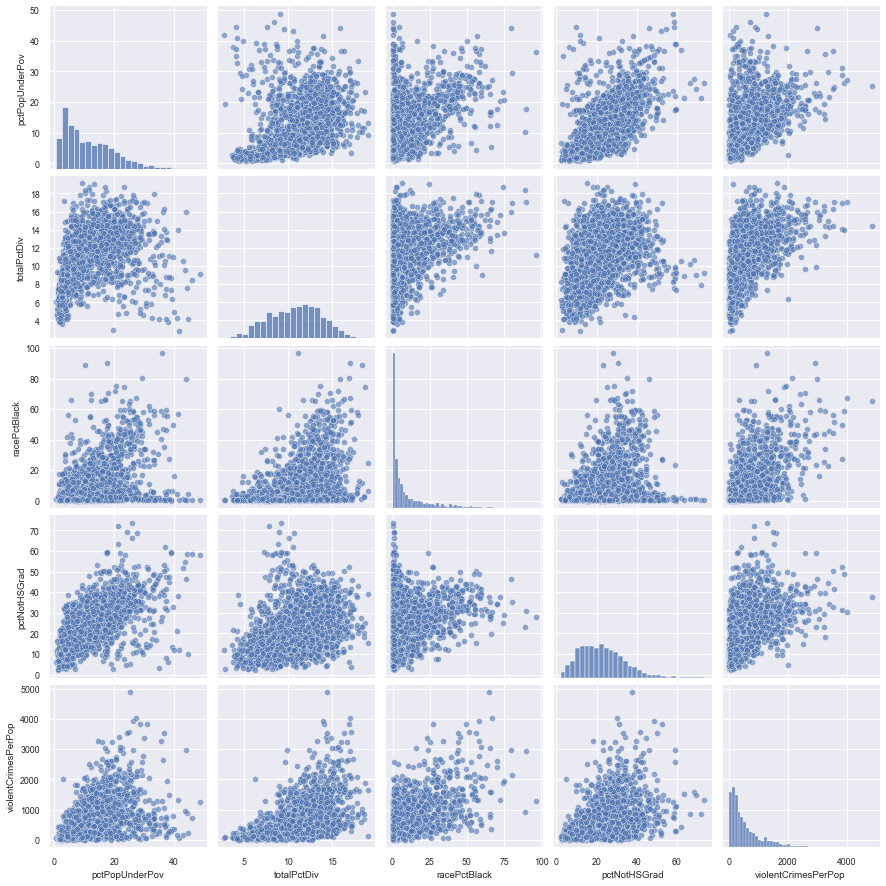

In [35]:
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png'

sns.pairplot(
    df_digPlus[features+target],
    plot_kws={'alpha':0.6}
)

#Searching and processing outlers

/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

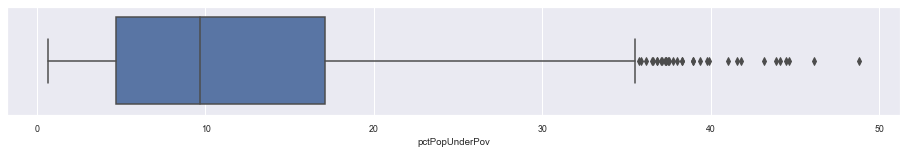

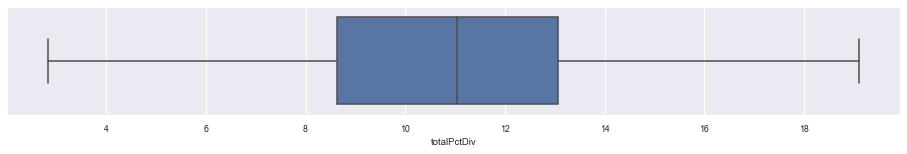

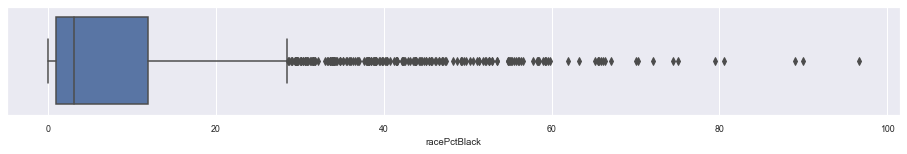

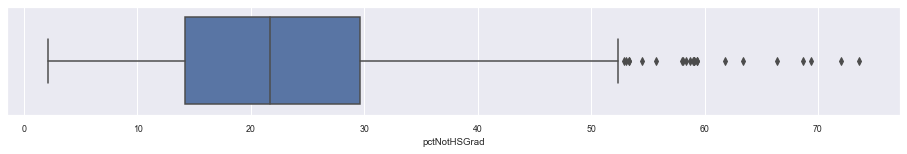

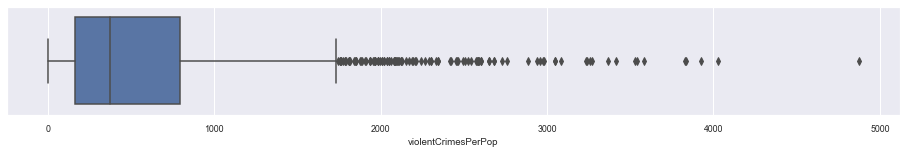

In [36]:
for faeture_name in (features+target):
    plt.figure(figsize=(16, 2))
    sns.boxplot(df_digPlus[faeture_name], orient = 'h')

/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ilafedotov/PycharmProjects/pythonProject/venv/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or u

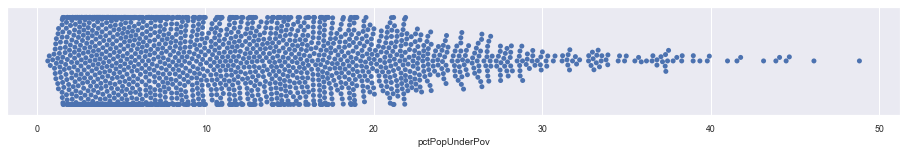

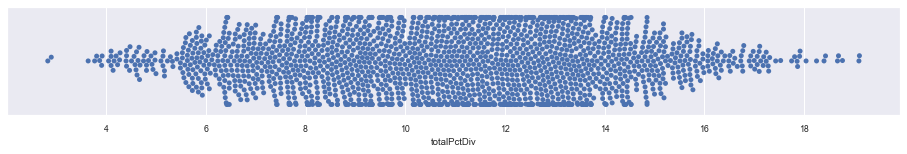

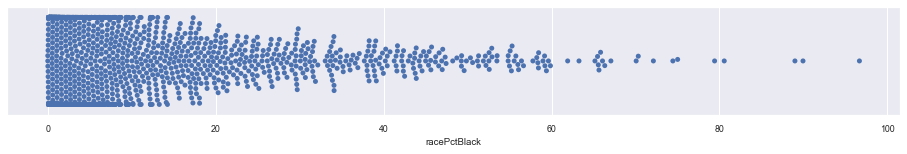

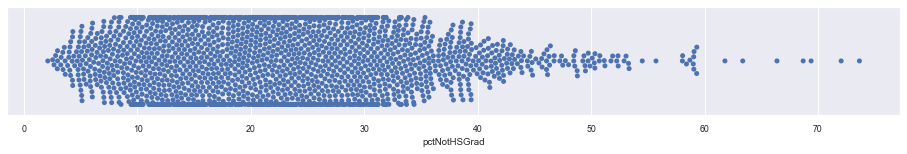

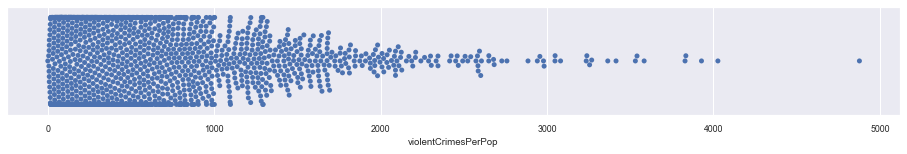

In [37]:
for faeture_name in (features+target):
    plt.figure(figsize=(16, 2))
    sns.swarmplot(x=faeture_name, data=df_digPlus, orient = 'h')

In [39]:
tressholdDict = {
    'pctPopUnderPov' : (0, 37),
    'racePctBlack' : (0, 40),
    'pctNotHSGrad' : (0, 55)
}

In [41]:
for feature_name in tressholdDict:
    fmin = tressholdDict[feature_name][0]
    fmax = tressholdDict[feature_name][1]
    over_count = len(df_digPlus[~((df_digPlus[feature_name] >= fmin)&(df_digPlus[feature_name] <= fmax))])

    dcount = df_digPlus[feature_name].count()

    print(f"{feature_name} thresholds {tressholdDict[feature_name]}. Number of elements that are outside thresholds - {over_count} out of {dcount} values ({over_count/dcount:.1%})\n")


pctPopUnderPov thresholds (0, 37). Number of elements that are outside thresholds - 26 out of 1994 values (1.3%)

racePctBlack thresholds (0, 40). Number of elements that are outside thresholds - 112 out of 1994 values (5.6%)

pctNotHSGrad thresholds (0, 55). Number of elements that are outside thresholds - 18 out of 1994 values (0.9%)



#Filterin

In [42]:
df_digPlusFiltred = df_digPlus.copy()
for feature_name in tressholdDict:
    fmin = tressholdDict[feature_name][0]
    fmax = tressholdDict[feature_name][1]
    df_digPlusFiltred = df_digPlusFiltred[(df_digPlusFiltred[feature_name] >= fmin)&(df_digPlusFiltred[feature_name] <= fmax)]
    print("Processed ", feature_name)

print (f"Discarded {len(df_digPlus)  - len(df_digPlusFiltred)} rows. { len(df_digPlusFiltred)} rows left.")

Processed  pctPopUnderPov
Processed  racePctBlack
Processed  pctNotHSGrad
Discarded 144 rows. 1850 rows left.


pctPopUnderPov 0.64 36.8
totalPctDiv 2.9 19.11
racePctBlack 0.0 39.97
pctNotHSGrad 2.09 53.35
violentCrimesPerPop 0.0 3829.21


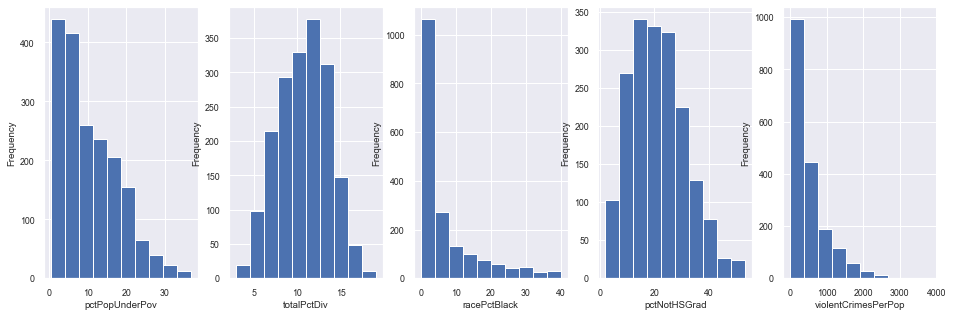

In [43]:
plt.figure(figsize=(16, 5))
plot_number = 0
for feature_name in (features+target):
    plot_number+=1
    plt.subplot(1, len(features+target), plot_number)
    plt.hist(df_digPlusFiltred[feature_name])
    plt.xlabel(f"{feature_name}")
    plt.ylabel("Frequency")
    print (feature_name,
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

#Save

In [144]:
df_digPlusFiltred.to_csv("cleaned_data",index = False)

#train and test

In [44]:
valid_size = 0.3
rand_seed = 8

x_train, x_test, y_train, y_test = train_test_split(df_digPlusFiltred[features], df_digPlusFiltred[target], test_size=valid_size, random_state=rand_seed, shuffle=True)


In [45]:
print ("Number of elements: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test),
    len(x_train)+len(x_test), len(y_train)+len(x_test),
))


Number of elements: 
  x_train: 1295, y_train 1295 
  x_test:  555, y_test  555 
  total x: 1850, total y 1850 


In [46]:
x_train.head()

,pctPopUnderPov,totalPctDiv,racePctBlack,pctNotHSGrad
1499,14.25,9.20,1.10,18.45
1262,3.85,6.38,1.62,9.91
1517,9.67,13.33,9.83,23.75
1436,6.76,9.88,0.46,31.09
316,10.19,9.64,0.14,15.20


In [47]:
y_train.head()

,violentCrimesPerPop
1499,104.17
1262,33.38
1517,1118.18
1436,117.03
316,291.16


In [48]:
lr = linear_model.LinearRegression()

In [49]:
lin_model_PctDiv = lr.fit(x_train[['totalPctDiv']], y_train[['violentCrimesPerPop']])

y_pred_CrimesPctDiv = lin_model_PctDiv.predict(x_test[['totalPctDiv']])

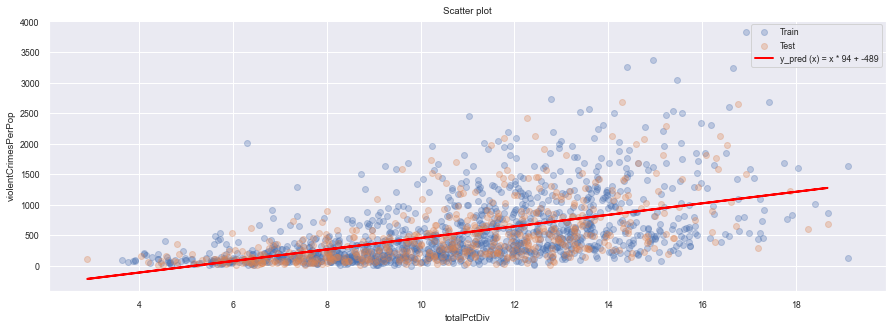

In [50]:
plt.figure(figsize=(15, 5))

plt.scatter(x_train[['totalPctDiv']], y_train[['violentCrimesPerPop']], alpha=0.3, label='Train')
plt.scatter(x_test[['totalPctDiv']], y_test[['violentCrimesPerPop']], alpha=0.3, label='Test')

label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model_PctDiv.coef_[0][0], lin_model_PctDiv.intercept_[0])

plt.plot(x_test['totalPctDiv'], y_pred_CrimesPctDiv, lw=2, color='red', label=label_str)

plt.legend(loc="best")
plt.xlabel('totalPctDiv')
plt.ylabel(target[0])
plt.title(u'Scatter plot');


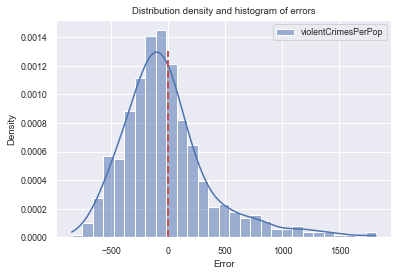

In [51]:
plt.figure(figsize=(6, 4))
sns.histplot(y_test[['violentCrimesPerPop']]- y_pred_CrimesPctDiv,
             color="red",
             kde=True,
             stat="density",
            )
plt.plot(
    [0, 0],
    [0, 0.0013], '--', lw=2, c='r')

plt.ylabel(u'Density')
plt.xlabel(u'Error')
plt.title(u'Distribution density and histogram of errors')
plt.show()

Text(0, 0.5, 'Absolute error')

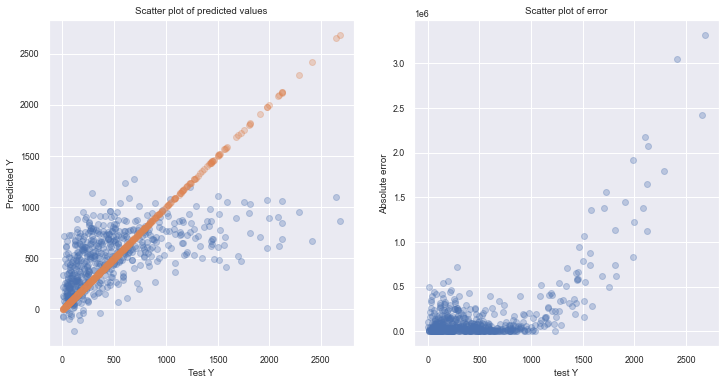

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(y_test[['violentCrimesPerPop']], y_pred_CrimesPctDiv,  alpha=0.3)
plt.scatter(y_test[['violentCrimesPerPop']], y_test[['violentCrimesPerPop']],  alpha=0.3)
plt.title('Scatter plot of predicted values')
plt.xlabel('Test Y')
plt.ylabel('Predicted Y')

plt.subplot(122)
plt.scatter(y_test[['violentCrimesPerPop']], (y_test[['violentCrimesPerPop']] - y_pred_CrimesPctDiv)**2,  alpha=0.3)

plt.title('Scatter plot of error')
plt.xlabel('test Y')
plt.ylabel('Absolute error')

In [53]:
print ("Linear univariate regression. Target 'violentCrimesPerPop'.")
print ("y_pred_CrimesPctDiv(x) = x * {} + {}\n".format(lin_model_PctDiv.coef_, lin_model_PctDiv.intercept_))

r2_LinRegr_PctDiv = metrics.r2_score(y_test[['violentCrimesPerPop']], y_pred_CrimesPctDiv)
mae_LinRegr_PctDiv = metrics.mean_absolute_error(y_test[['violentCrimesPerPop']], y_pred_CrimesPctDiv)
rmse_LinRegr_PctDiv = np.sqrt(metrics.mean_squared_error(y_test[['violentCrimesPerPop']], y_pred_CrimesPctDiv))
print ("R2: {:>7,.3f}".format ( r2_LinRegr_PctDiv ))
print ("MAE: {:>7,.3f}".format ( mae_LinRegr_PctDiv ))
print ("RMSE: {:>7,.3f}".format( rmse_LinRegr_PctDiv ))

Linear univariate regression. Target 'violentCrimesPerPop'.
y_pred_CrimesPctDiv(x) = x * [[94.48940788]] + [-489.21705013]

R2:   0.304
MAE: 289.234
RMSE: 398.023


#Model 1

In [54]:
lr_x1x2 = linear_model.LinearRegression()
lin_model_x1x2 = lr_x1x2.fit(x_train[['totalPctDiv', 'pctPopUnderPov']], y_train[['violentCrimesPerPop']])

y_pred_x1x2  = lin_model_x1x2.predict(x_test[['totalPctDiv', 'pctPopUnderPov']])

In [55]:
print ("Linear Multivariate Regression. Target 'violentCrimesPerPop'.")
print ("violentCrimesPerPop (x) = x * {} + {}\n".format(lin_model_x1x2.coef_, lin_model_x1x2.intercept_))

r2_LinRegr_x1x2 = metrics.r2_score(y_test[['violentCrimesPerPop']], y_pred_x1x2)
mae_LinRegr_x1x2 = metrics.mean_absolute_error(y_test[['violentCrimesPerPop']], y_pred_x1x2)
rmse_LinRegr_x1x2 = np.sqrt(metrics.mean_squared_error(y_test[['violentCrimesPerPop']], y_pred_x1x2))

print ("R2: {:>7,.3f}".format ( r2_LinRegr_x1x2 ))
print ("MAE: {:>7,.3f}".format ( mae_LinRegr_x1x2 ))
print ("RMSE: {:>7,.3f}".format( rmse_LinRegr_x1x2 ))

Linear Multivariate Regression. Target 'violentCrimesPerPop'.
violentCrimesPerPop (x) = x * [[69.19623583 21.77981987]] + [-455.3250006]

R2:   0.401
MAE: 262.125
RMSE: 369.231


#Model 2

In [56]:
lr_x3x4 = linear_model.LinearRegression()
lin_model_x3x4 = lr_x3x4.fit(x_train[['racePctBlack', 'pctNotHSGrad']], y_train[['violentCrimesPerPop']])

y_pred_x3x4  = lin_model_x3x4.predict(x_test[['racePctBlack', 'pctNotHSGrad']])

In [57]:
print ("Linear Multivariate Regression. Target 'violentCrimesPerPop'.")
print ("violentCrimesPerPop (x) = x * {} + {}\n".format(lin_model_x3x4.coef_, lin_model_x3x4.intercept_))

r2_LinRegr_x3x4 = metrics.r2_score(y_test[['violentCrimesPerPop']], y_pred_x3x4)
mae_LinRegr_x3x4 = metrics.mean_absolute_error(y_test[['violentCrimesPerPop']], y_pred_x3x4)
rmse_LinRegr_x3x4 = np.sqrt(metrics.mean_squared_error(y_test[['violentCrimesPerPop']], y_pred_x3x4))

print ("R2: {:>7,.3f}".format ( r2_LinRegr_x3x4 ))
print ("MAE: {:>7,.3f}".format ( mae_LinRegr_x3x4 ))
print ("RMSE: {:>7,.3f}".format( rmse_LinRegr_x3x4 ))

Linear Multivariate Regression. Target 'violentCrimesPerPop'.
violentCrimesPerPop (x) = x * [[29.78685644 13.34325532]] + [32.05372341]

R2:   0.365
MAE: 277.465
RMSE: 380.004


In [58]:
ddf = pd.DataFrame (
    {
        "Column": ["totalPctDiv", "totalPctDiv, pctPopUnderPov", "racePctBlack, pctNotHSGrad"],
        "K":       [94.48940788,     [69.19623583, 21.77981987],     [29.78685644, 13.34325532]],
        "B":       [-489.21705013,     -455.3250006,     32.05372341],
        "MAE":     [289.234,     262.125,     277.465],
        "RMSE":    [398.023,     369.231,     380.004],
        "R2":      [ 0.304,      0.401,     0.365],
    }
 )
ddf


,Column,K,B,MAE,RMSE,R2
0,totalPctDiv,94.489408,-489.217050,289.234,398.023,0.304
1,"totalPctDiv, pctPopUnderPov","[69.19623583, 21.77981987]",-455.325001,262.125,369.231,0.401
2,"racePctBlack, pctNotHSGrad","[29.78685644, 13.34325532]",32.053723,277.465,380.004,0.365
